In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from utils import get_words, save_img, resize, normalize_images, gen_alphabet
from highlight import HighlightWords
from keras.models import load_model
from keras.backend import set_learning_phase
from collections import Counter

Using TensorFlow backend.


In [2]:
def plot_img(img, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')

In [3]:
def process_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)[1]
    return img

In [4]:
def read_imgs(path, process=True):
    filenames = os.listdir(path)
    if process:
        imgs = [process_img(path + name) for name in filenames if not 'ipynb' in name and not 'DS' in name]
    else:
        imgs = [cv2.imread(path + name) for name in filenames if not 'ipynb' in name and not 'DS' in name ]
    return imgs

In [5]:
def read_one_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY_INV)[1]
    
    return img

In [6]:
path = 'course_project/test/x_test/'
filenames = os.listdir(path)
imgs = read_imgs(path)

originals = read_imgs(path, process=False)

In [7]:
%%time
model = load_model('course_project/Models/model.h5')
# model.load_weights('course_project/Models/weights_15.h5')
set_learning_phase(0)

W0906 22:18:31.333600 4472919488 deprecation_wrapper.py:119] From /Users/svatoslavdarmograj/Documents/ml/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 22:18:31.422052 4472919488 deprecation_wrapper.py:119] From /Users/svatoslavdarmograj/Documents/ml/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 22:18:31.454251 4472919488 deprecation_wrapper.py:119] From /Users/svatoslavdarmograj/Documents/ml/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 22:18:31.455028 4472919488 deprecation_wrapper.py:119] From /Users/svatoslavdarmograj/Documents/ml/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_sess

CPU times: user 56.5 s, sys: 1.86 s, total: 58.4 s
Wall time: 1min 1s


In [8]:
img = cv2.imread('course_project/test/x_test/47.png')

In [9]:
%%time
hw = HighlightWords(img, model=model)

CPU times: user 24.9 s, sys: 1.84 s, total: 26.7 s
Wall time: 12 s


In [10]:
hw._text

'and you know what they call a quarter pounder with cheese 1n par1s? they do not call it a quarter pounder with cheese? no, they got the metric system there, they would not know what the fuck a quarter p0under 1s. what do they call it? they call it royale with cheese. royale with cheese. what do they call a big mac? '

In [11]:
hw._corrected_text

'and you know what they call a quarter plunder with cheese in parts? they do not call it a quarter plunder with cheese? no, they got the merit system there, they would not know what the fuck a quarter plunder is. what do they call it? they call it royale with cheese. royale with cheese. what do they call a big mac? '

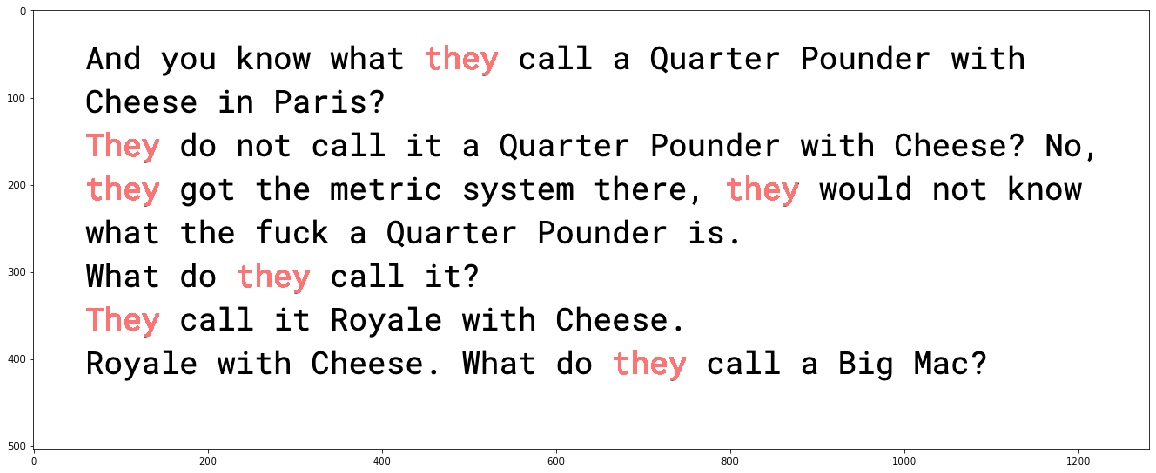

In [12]:
plot_img(hw._highlighted_img)

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [ ]:
tmp_img = img.copy()
for word in hw._bboxes_chars:
    for x, y, w, h in word:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0))
plot_img(img)

In [ ]:
x, y, w, h = hw._bboxes_chars[7][0]
tmp_img = hw._thresholded_img[y:y+h, x:x+w]
# tmp_img = cv2.threshold(tmp_img, 1, 255, cv2.THRESH_BINARY)[1]
tmp_img = resize(hw._thresholded_img, (x, y, w, h))

# tmp_img = plt.imread('course_project/train/Abel/a.jpg')
# tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2GRAY)

tmp_img = normalize_images(tmp_img)

plt.imshow(tmp_img.reshape((28, 28)), cmap='gray')
gen_alphabet()[np.argmax(model.predict(tmp_img.reshape((1, 28, 28, 1))))]

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [ ]:
img = imgs[9].copy()
img_or = originals[9].copy()
plot_img(img)

In [ ]:
for x, y, w, h in words:
    cv2.rectangle(img_or, (x, y), (x+w, y+h), (0, 255, 0))
plot_img(img_or)

In [ ]:
%%time
path_to_save = 'course_project/tested/'
for i, img in enumerate(imgs):
    words = get_words(img)
    temp_img = originals[i]
    for j, (x, y, w, h) in enumerate(words):
        cv2.rectangle(temp_img, (x, y), (x+w, y+h), (0, 255, 0))
    save_img(path_to_save, temp_img, '{}.jpg'.format(i))

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [19]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   Project.ipynb
	modified:   course_project/.DS_Store
	modified:   highlight.py
	modified:   utils.py

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	deleted:    course_project/Models/main_model.h5

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	colab_notebooks/
	course_project/Models/model.h5
	course_project/Models/weights_125.h5
	course_project/Models/weights_15.h5
	course_project/Models/weights_250.h5
	course_project/alphabet/
	course_project/test/
	course_project/tested/
	course_project/train/

